# Working sheet
## 04 - Multiple logistic regression with R
V04.01.00 - 2024-02-24

## Load data
Change the path and the file name in the following box.

In [1]:
library(readr)
df <- read_csv("data/titanic.csv",
                 show_col_types = FALSE)
df$Pclass <- as.factor(df$Pclass)
df$Sex <- as.factor(df$Sex)


Look at the structure and the head of the dataset.

In [2]:
str(df)

spc_tbl_ [891 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] NA "C85" NA "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),


In [3]:
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Look at frequencies and descriptive statistics.

The summary() function is the first approach.

describe() from the Hmisc package is an alternative.

In [4]:
summary(df)

  PassengerId       Survived      Pclass      Name               Sex     
 Min.   :  1.0   Min.   :0.0000   1:216   Length:891         female:314  
 1st Qu.:223.5   1st Qu.:0.0000   2:184   Class :character   male  :577  
 Median :446.0   Median :0.0000   3:491   Mode  :character               
 Mean   :446.0   Mean   :0.3838                                          
 3rd Qu.:668.5   3rd Qu.:1.0000                                          
 Max.   :891.0   Max.   :1.0000                                          
                                                                         
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000                

In [5]:
library(Hmisc)
describe(df)


Attache Paket: 'Hmisc'


Die folgenden Objekte sind maskiert von 'package:base':

    format.pval, units




df 

 12  Variables      891  Observations
--------------------------------------------------------------------------------
PassengerId 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     891        0      891        1      446    297.3     45.5     90.0 
     .25      .50      .75      .90      .95 
   223.5    446.0    668.5    802.0    846.5 

lowest :   1   2   3   4   5, highest: 887 888 889 890 891
--------------------------------------------------------------------------------
Survived 
       n  missing distinct     Info      Sum     Mean      Gmd 
     891        0        2     0.71      342   0.3838   0.4735 

--------------------------------------------------------------------------------
Pclass 
       n  missing distinct 
     891        0        3 
                            
Value          1     2     3
Frequency    216   184   491
Proportion 0.242 0.207 0.551
--------------------------------------------------------------------------------
Nam

Plot the variables of interest with a scatter plot.

Either as single plots as in the following plot.

Warning message:
"Removed 177 rows containing missing values (`geom_point()`)."


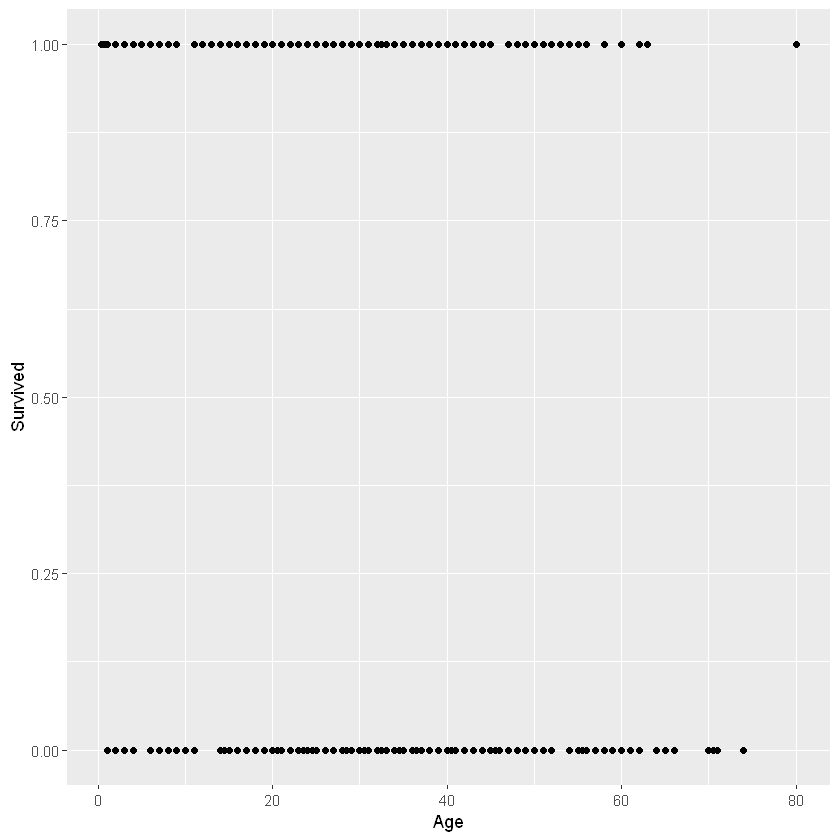

In [6]:
library(ggplot2)
ggplot(df, aes(x = Age, y = Survived)) +
  geom_point()

Warning message:
"Removed 177 rows containing non-finite values (`stat_density()`)."
Warning message:
"Removed 177 rows containing non-finite values (`stat_boxplot()`)."
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 177 rows containing missing values"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 177 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 177 rows containing missing values (`geom_point()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


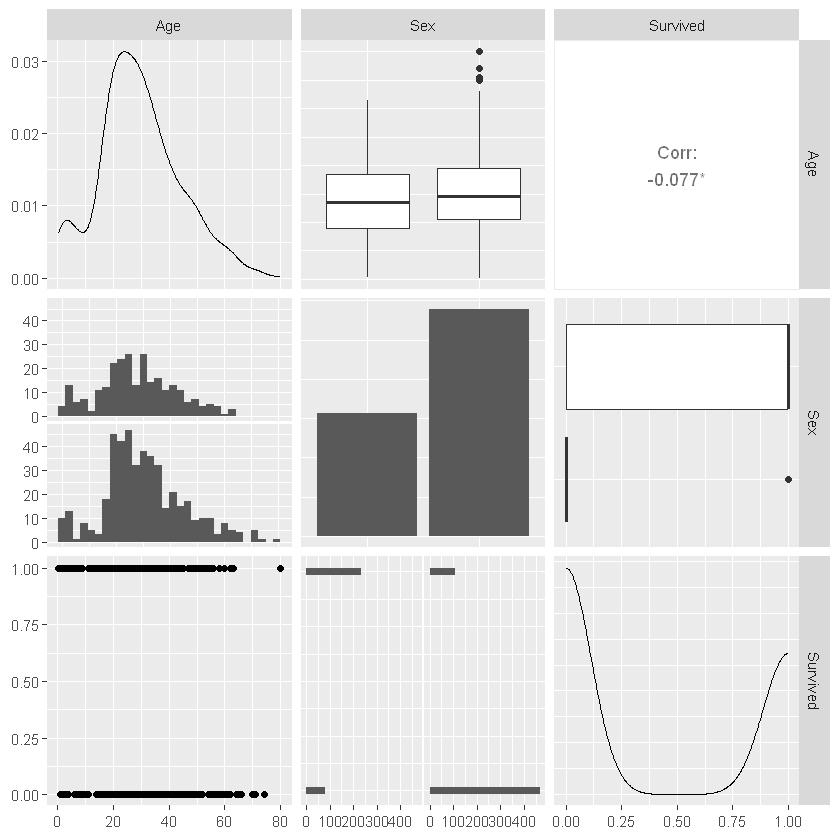

In [9]:
library(GGally)
library(tidyverse)
ggpairs(df %>% select(Age, Sex, Survived))

Warning message:
"Removed 177 rows containing non-finite values (`stat_qq()`)."
Warning message:
"Removed 177 rows containing non-finite values (`stat_qq_line()`)."


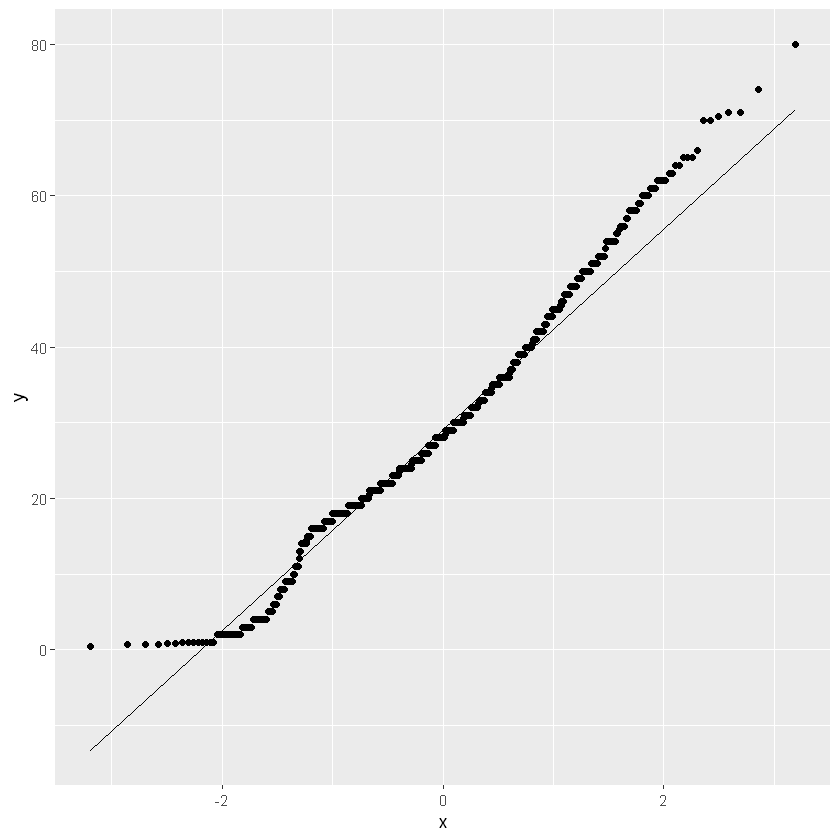

In [10]:
ggplot(df, aes(sample = Age)) + 
  geom_qq() +
  geom_qq_line()

## Assumptions for logistic regression

- The dependent variable is nominally scaled with exactly two values (dichotomous).
- The independent variable is either nominally scaled or at least interval scaled.
- Independence of observations.
- We need at least a certain number of cases per predictor. As with many other regressions, binomial logistic regression results improve as the sample size increases.
- There should be no outliers in the data.
- Linearity. There must be a linear relationship between the continuous independent variables and the logit transformation of the dependent variable.
- No multicolinearity.


The dependent variable is nominally scaled with exactly two values (dichotomous).

In [11]:
table(df$Survived)


  0   1 
549 342 

In [13]:
library(broom) 
my_logistic <- glm(Survived ~ Sex + Pclass + Age, data = df, family = binomial)

summary(my_logistic)



Call:
glm(formula = Survived ~ Sex + Pclass + Age, family = binomial, 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.777013   0.401123   9.416  < 2e-16 ***
Sexmale     -2.522781   0.207391 -12.164  < 2e-16 ***
Pclass2     -1.309799   0.278066  -4.710 2.47e-06 ***
Pclass3     -2.580625   0.281442  -9.169  < 2e-16 ***
Age         -0.036985   0.007656  -4.831 1.36e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 647.28  on 709  degrees of freedom
  (177 Beobachtungen als fehlend gelöscht)
AIC: 657.28

Number of Fisher Scoring iterations: 5


In [31]:
glance(my_logistic)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
498.0978,391,-193.333,390.666,398.6085,386.666,390,392


In [14]:
my_logistic_intercept <- glm(Survived ~ 1, data = df, family = binomial)
glance(my_logistic_intercept)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1186.655,890,-593.3276,1188.655,1193.447,1186.655,890,891


In [16]:
# z-test
# Wald’s chi-squared statistic for the hypothesis that the coefficient of age
# is zero, or equivalently that the odds-ratio is one
m0 <- glm(Survived ~ 1, data = df, family = binomial)
m1 <- glm(Survived ~ Age, data = df, family = binomial)

b <- coef(m1)
se <- sqrt(diag(vcov(m1)))
(b[2]/se[2])^2

# likeli ratio test
#-2*(logLik(m0) - logLik(m1))
-2*(logLik(m0) - logLik(m1))


Age 
4.231068

'log Lik.' 226.4267 (df=1)

In [17]:
tidy(my_logistic)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.77701265,0.401123305,9.416089,4.682044e-21
Sexmale,-2.52278092,0.207390924,-12.164375,4.811152e-34
Pclass2,-1.30979927,0.278065527,-4.710398,2.472337e-06
Pclass3,-2.58062532,0.281442020,-9.169296,4.761161e-20
Age,-0.03698527,0.007655948,-4.830919,1.359041e-06


In [18]:
summary(my_logistic)


Call:
glm(formula = Survived ~ Sex + Pclass + Age, family = binomial, 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.777013   0.401123   9.416  < 2e-16 ***
Sexmale     -2.522781   0.207391 -12.164  < 2e-16 ***
Pclass2     -1.309799   0.278066  -4.710 2.47e-06 ***
Pclass3     -2.580625   0.281442  -9.169  < 2e-16 ***
Age         -0.036985   0.007656  -4.831 1.36e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 647.28  on 709  degrees of freedom
  (177 Beobachtungen als fehlend gelöscht)
AIC: 657.28

Number of Fisher Scoring iterations: 5


In [19]:
exp(my_logistic$coeff)
suppressMessages(exp(confint(my_logistic)))

(Intercept)     Sexmale     Pclass2     Pclass3         Age 
43.68534331  0.08023617  0.26987422  0.07572664  0.96369033

,2.5 %,97.5 %
(Intercept),20.37890724,98.3863313
Sexmale,0.05293643,0.1194848
Pclass2,0.15515074,0.4621731
Pclass3,0.04299250,0.1297997
Age,0.94905346,0.9780124


In [20]:
library(survival)
concordance(my_logistic)

Call:
concordance.lm(object = my_logistic)

n= 714 
Concordance= 0.8523 se= 0.01549
concordant discordant     tied.x     tied.y    tied.xy 
    104647      18004        309     130627        954 

In [24]:
library(yardstick)
obs <- as.integer(df %>% select(Survived, Age, Sex, Pclass) %>% na.omit() %>% pull(Survived))
pred <- as.integer(round(predict(my_logistic, type = "response")))
str(obs)
str(pred)
df1 <- table("Observed" = obs, "Predicted" = pred)
df1

 int [1:714] 0 1 1 1 0 0 0 1 1 1 ...
 int [1:714] 0 1 1 1 0 0 0 1 1 1 ...


        Predicted
Observed   0   1
       0 356  68
       1  83 207

In [25]:
cf <- conf_mat(df1, truth = obs, estimate = pred)
summary(cf)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7885154
kap,binary,0.5579763
sens,binary,0.8109339
spec,binary,0.7527273
ppv,binary,0.8396226
npv,binary,0.7137931
mcc,binary,0.5585150
j_index,binary,0.5636612
bal_accuracy,binary,0.7818306
